In [1]:
%load_ext autoreload
%autoreload
import argparse
import copy
import json
import os
import sys

sys.path.append("../")
sys.path.append("../src")

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pandas as pd
from IPython import embed
from matplotlib import pyplot as plt
from torch.autograd import Variable


%matplotlib inline

In [17]:
%autoreload
import src
from src.i3dense import I3DenseNet
from src.i3res import I3ResNet
from src.evaluator import Evaluator
from src.mit_data import MITDataset
from src.train import train, validation_loss
from src.video_handler import VideoViewer
from src.label_handler import LabelHandler
from src.run import Run
from src.analyze import ResultAnalyzer, plot_learning_curve
import experiment.resnet2d_top20 as resnet2d
import experiment.resnet3d_top20 as resnet3d

## some setup

In [3]:
run_3d = Run("../experiment/resnet3d_top20/run_0001")
run_3d_binary = Run("../experiment/resnet3d_binary/normal_lr_1218/")
run_3d_binary_lowlr = Run("../experiment/resnet3d_binary/low_lr_1218/")
run_2d_low = Run("../experiment/resnet2d_top20/low_lr_run2/")
run_2d_normal = Run("../experiment/resnet2d_top20/normal_lr_run2/")
run_2d_binary = Run("../experiment/resnet2d_binary/run_1215/")
run_cifar = Run("../experiment/cifar10/test1217_lowlr/")
mlb = resnet2d.mlb

## Visualize training loss

(0, 0.5)

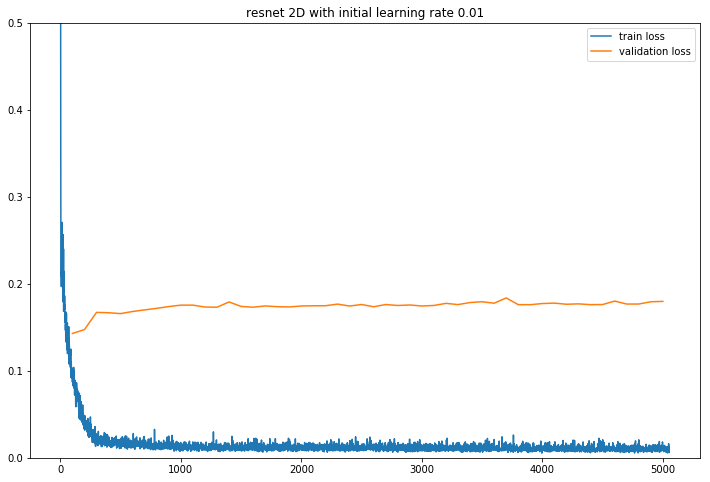

In [41]:
plot_learning_curve(
    run_2d_low.log_file,
    run_2d_low.figure_file("learning_curve.pdf"),
    title="resnet 2D with initial learning rate 0.01")
plt.ylim(0,0.5)

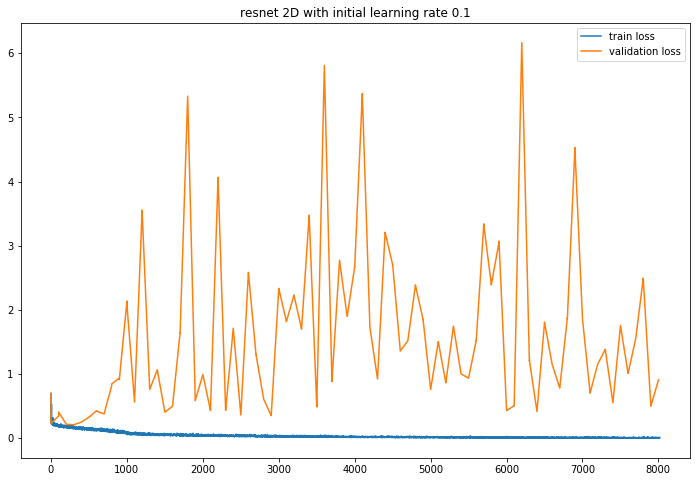

In [30]:
plot_learning_curve(
    run_2d_normal.log_file,
    run_2d_normal.figure_file("learning_curve.pdf"),
    title="resnet 2D with initial learning rate 0.1")

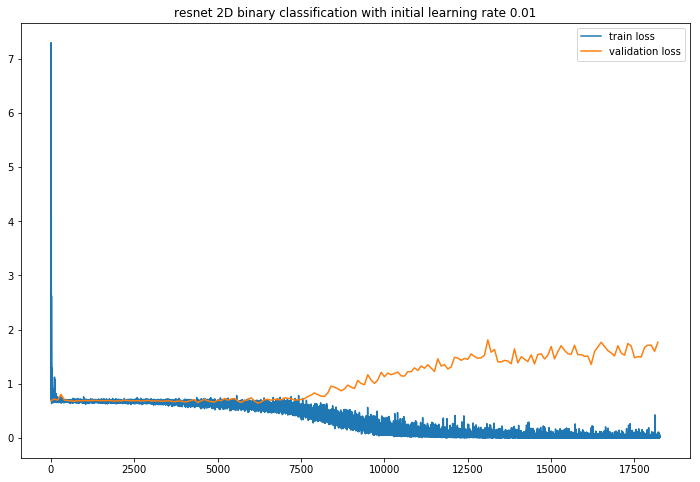

In [42]:
plot_learning_curve(
    run_2d_binary.log_file,
    run_2d_binary.figure_file("learning_curve.pdf"),
    title="resnet 2D binary classification with initial learning rate 0.01")

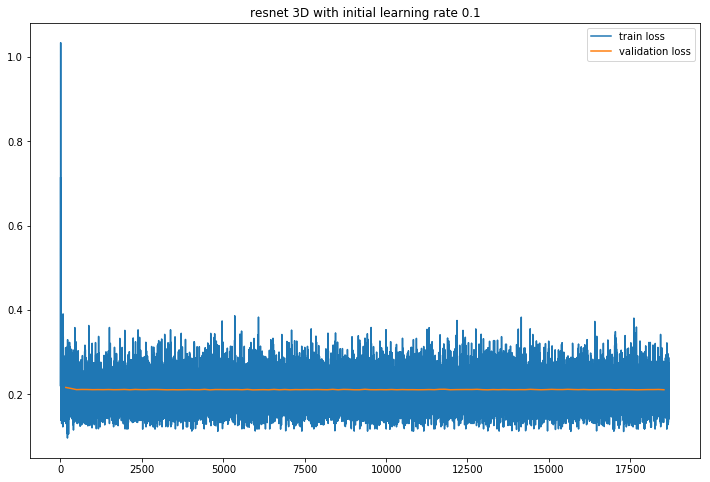

In [43]:
plot_learning_curve(
    run_3d.log_file,
    run_3d.figure_file("learning_curve.pdf"),
    title="resnet 3D with initial learning rate 0.1")

(0, 3.5)

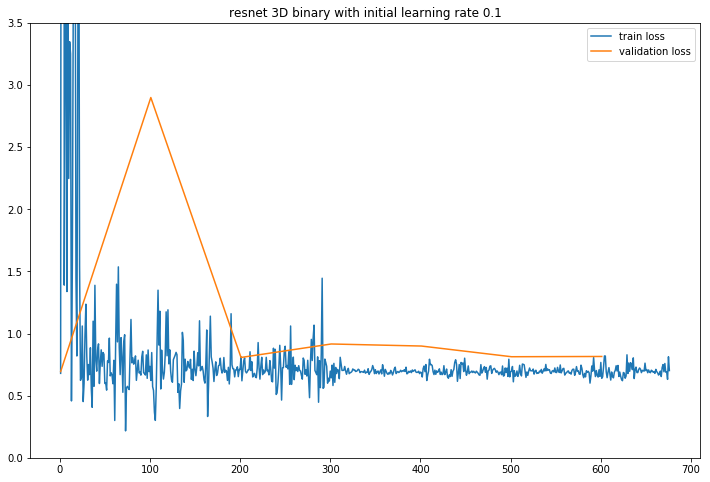

In [45]:
plot_learning_curve(
    run_3d_binary.log_file,
    run_3d_binary.figure_file("learning_curve.pdf"),
    title="resnet 3D binary with initial learning rate 0.1")
ax = plt.gca()
ax.set_ylim(0,3.5)

(0, 3.5)

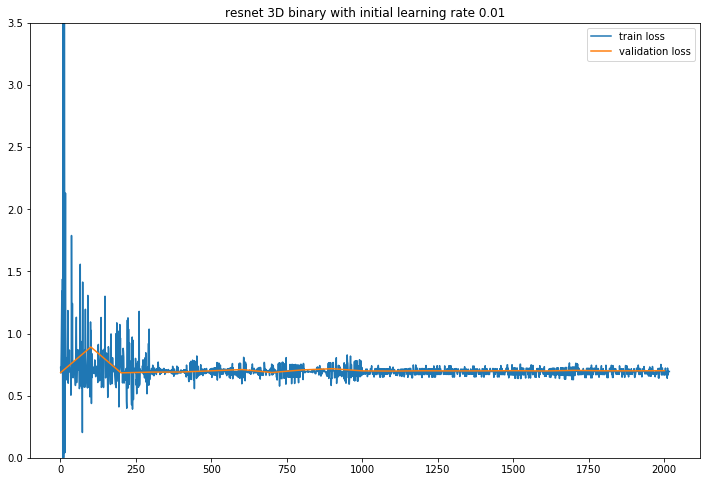

In [44]:
plot_learning_curve(
    run_3d_binary_lowlr.log_file,
    run_3d_binary_lowlr.figure_file("learning_curve.pdf"),
    title="resnet 3D binary with initial learning rate 0.01")
plt.ylim(0, 3.5)

In [ ]:
plot_learning_curve(
    run_cifar.log_file,
    run_cifar.figure_file("learning_curve.pdf"),
    title="resnet 2D cifar with initial learning rate 0.1")
ax = plt.gca()
ax.set_ylim(0,5)

## Evaluate validation set and compute some statistics
### resnet2d model (20 class classification)

In [38]:
cuda = torch.device("cuda:1")
mlb = resnet2d.mlb
model2d = copy.deepcopy(resnet2d.model)
val_dataloader_2d = resnet2d.val_dataloader
dataloader = resnet2d.dataloader
model2d.to(cuda)
original_model = copy.deepcopy(resnet2d.model)
model2d.load_state_dict(torch.load(run_2d_low.weight_step(4000), map_location=cuda))

#### AUC for validation data

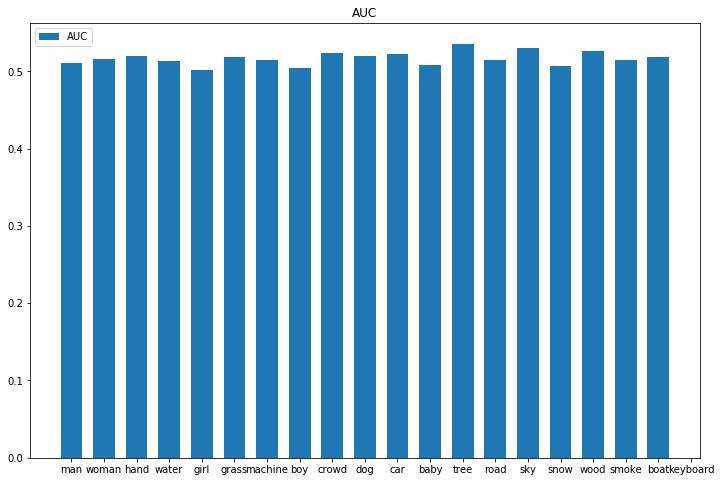

In [24]:
model2d.load_state_dict(torch.load(run_2d_low.weight_step(4000), map_location=cuda))
evalu_2d = Evaluator()
# evalu_2d.run(model2d, val_dataloader_2d, run_2d_low.val_eval_step(5000))
result_2d = ResultAnalyzer(run_2d_low.val_eval_step(5000), resnet2d.INDEX_FILE)
result_2d.auc()
result_2d.plot_auc(run_2d_low.figure_file("val_auc_5000.pdf"))

#### AUC for training data

14677504
inferencing number    0
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number    1
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number    2
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number    3
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number    4
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number    5
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number    6
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number    7
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number    8
saving result to ../experiment/resnet2d_top20/low_lr_run2/train

saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number   74
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number   75
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number   76
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number   77
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number   78
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number   79
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number   80
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferencing number   81
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
14677504
inferen

saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  147
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  148
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  149
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  150
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  151
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  152
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  153
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  154
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing numb

9700864
inferencing number  220
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  221
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  222
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  223
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  224
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  225
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  226
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  227
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  228
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005

saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  294
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  295
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  296
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  297
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  298
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  299
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  300
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  301
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing numb

saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  368
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  369
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  370
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  371
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  372
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  373
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  374
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  375
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing numb

saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  442
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  443
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  444
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  445
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  446
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  447
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  448
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  449
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing numb

saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  516
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  517
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  518
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  519
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  520
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  521
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  522
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  523
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing numb

saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  590
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  591
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  592
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  593
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  594
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  595
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  596
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  597
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing numb

9700864
inferencing number  663
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  664
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  665
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  666
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  667
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  668
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  669
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  670
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  671
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005

saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  737
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  738
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  739
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  740
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  741
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  742
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  743
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  744
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing numb

9700864
inferencing number  810
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  811
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  812
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  813
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  814
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  815
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  816
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  817
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  818
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005

saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  884
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  885
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  886
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  887
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  888
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  889
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  890
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  891
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing numb

9700864
inferencing number  957
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  958
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  959
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  960
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  961
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  962
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  963
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  964
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number  965
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005

saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1031
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1032
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1033
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1034
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1035
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1036
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1037
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1038
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing numb

9700864
inferencing number 1104
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1105
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1106
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1107
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1108
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1109
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1110
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1111
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1112
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005

saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1178
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1179
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1180
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1181
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1182
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1183
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1184
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1185
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing numb

9700864
inferencing number 1251
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1252
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1253
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1254
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1255
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1256
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1257
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1258
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005000.csv
9700864
inferencing number 1259
saving result to ../experiment/resnet2d_top20/low_lr_run2/train_eval_005

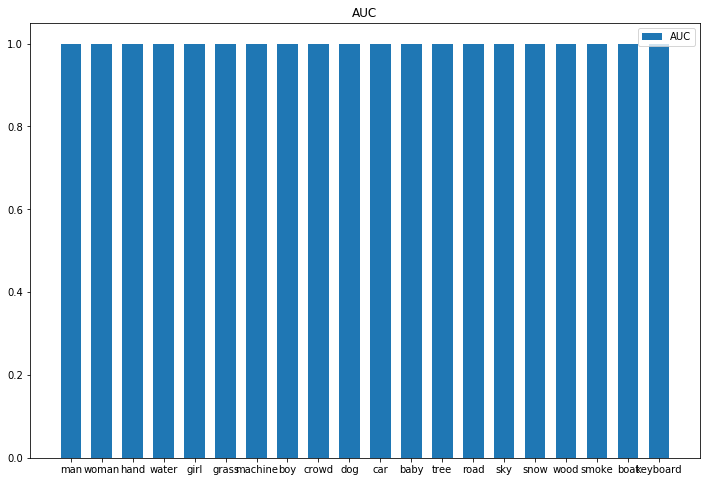

In [40]:
model2d.load_state_dict(
    torch.load(run_2d_low.weight_step(4000), map_location=cuda))
evalu_2d = Evaluator()
evalu_2d.run(model2d, dataloader, run_2d_low.train_eval_step(5000),device=cuda)
result_2d = ResultAnalyzer(run_2d_low.train_eval_step(5000), resnet2d.INDEX_FILE)
result_2d.auc()
result_2d.plot_auc(run_2d_low.figure_file("train_auc_5000.pdf"))

### resnet3d model (20 class classification)

In [36]:
cuda = torch.device("cuda:1")
mlb = resnet3d.mlb
model3d = copy.deepcopy(resnet3d.model)
val_dataloader_3d = resnet3d.val_dataloader
train_dataloader_3d = resnet3d.dataloader
model3d.to(cuda)
model3d.load_state_dict(
    torch.load(run_3d.weight_step(34000), map_location=cuda))

RuntimeError: Error(s) in loading state_dict for I3ResNet:
	While copying the parameter named "conv1.weight", whose dimensions in the model are torch.Size([64, 3, 3, 7, 7]) and whose dimensions in the checkpoint are torch.Size([64, 3, 3, 7, 7]).

#### AUC for validation data

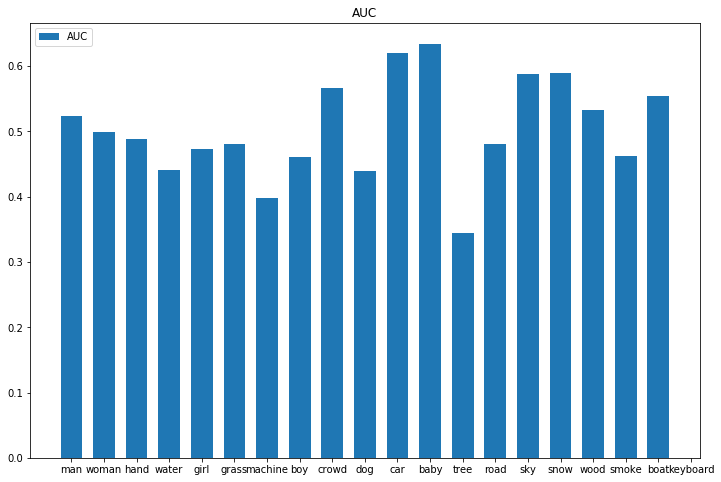

In [21]:
model3d.load_state_dict(
    torch.load(run_3d.weight_step(34000), map_location=cuda))
evalu_3d = Evaluator()
# evalu_3d.run(model3d, val_dataloader_3d, run_3d.val_eval_step(34000),device=cuda)
result_3d = ResultAnalyzer(
    run_3d.val_eval_step(34000), resnet3d.INDEX_FILE)
result_3d.auc()
result_3d.plot_auc(run_3d.figure_file("val_auc.pdf"))

#### AUC for training data

In [18]:
model3d.load_state_dict(
    torch.load(run_3d.weight_step(34000), map_location=cuda))
evalu_3d = Evaluator()
# evalu_3d.run(model3d, train_dataloader_3d, run_3d.train_eval_step(34000),device=cuda)
result_3d = ResultAnalyzer(
    run_3d.train_eval_step(34000), resnet3d.INDEX_FILE)
auc_3d_train = result_3d.auc()

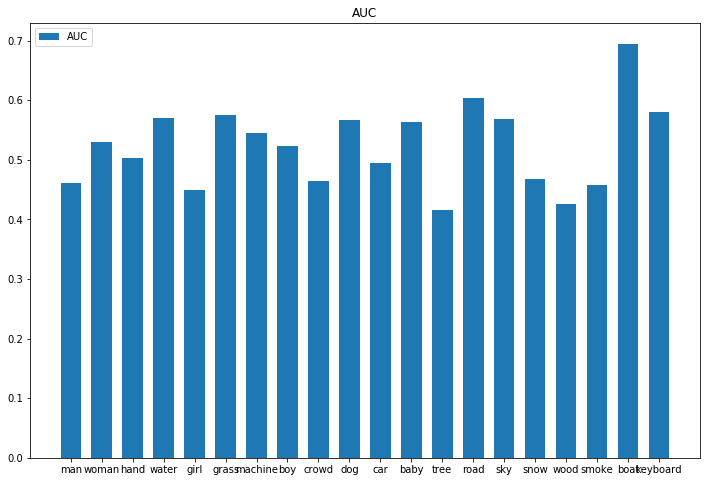

In [19]:
result_3d.plot_auc(run_3d.figure_file("AUC.pdf"))